## Problem Definition
Predict the monthly revenue generated from a streaming service user using a suitable machine learning model.
The goal is to learn the relationship between viewing behavior (time spent, watch duration) and subscription plan to estimate monthly revenue.

## Data Loading

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('movie_streaming_data.csv')

In [3]:
df.head()

,time_spent_hours_per_week,avg_watch_duration_minutes,subscription_plan,monthly_revenue_usd
0,8.12,113.78,Basic,198.14
1,19.06,94.33,Standard,256.08
2,14.91,67.14,Premium,174.23
3,12.37,127.66,Standard,247.82
4,3.96,112.17,Premium,217.29


## Data Exploration & Preprocessing

In [4]:
df.describe()

,time_spent_hours_per_week,avg_watch_duration_minutes,monthly_revenue_usd
count,500.000000,500.000000,500.000000
mean,10.472580,87.834140,193.361580
std,5.675233,34.259046,57.679674
min,1.100000,30.560000,62.300000
25%,5.587500,57.492500,145.622500
50%,10.750000,86.620000,194.770000
75%,15.370000,117.162500,238.820000
max,19.870000,149.970000,313.030000


In [5]:
df['subscription_plan'].value_counts()

subscription_plan
Standard    200
Basic       188
Premium     112
Name: count, dtype: int64

In [6]:
import matplotlib.pyplot as plt

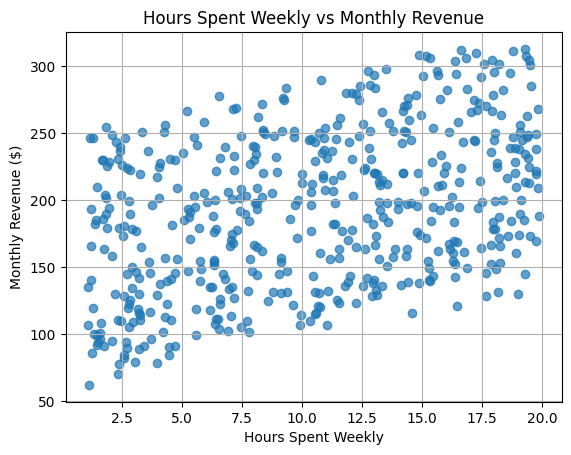

In [7]:
plt.scatter(df['time_spent_hours_per_week'], df['monthly_revenue_usd'], alpha=0.7)
plt.title('Hours Spent Weekly vs Monthly Revenue')
plt.xlabel('Hours Spent Weekly')
plt.ylabel('Monthly Revenue ($)')
plt.grid(True)
plt.show()

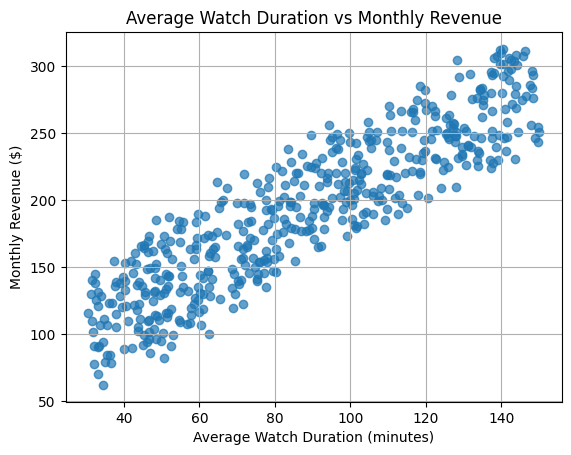

In [8]:
plt.scatter(df['avg_watch_duration_minutes'], df['monthly_revenue_usd'], alpha=0.7)
plt.title('Average Watch Duration vs Monthly Revenue')
plt.xlabel('Average Watch Duration (minutes)')
plt.ylabel('Monthly Revenue ($)')
plt.grid(True)
plt.show()

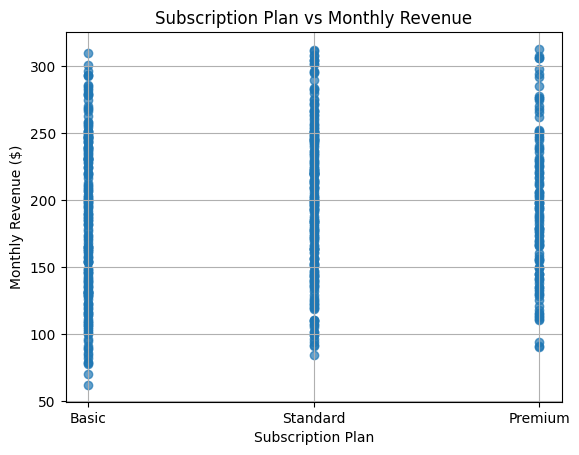

In [9]:
plt.scatter(df['subscription_plan'], df['monthly_revenue_usd'], alpha=0.7)
plt.title('Subscription Plan vs Monthly Revenue')
plt.xlabel('Subscription Plan')
plt.ylabel('Monthly Revenue ($)')
plt.grid(True)
plt.show()

For 3d visualization, Run `04_movie_streaming_revenue_prediction/visualize_3d.py`

In [10]:
subscription_one_hot_encoding = pd.get_dummies(df['subscription_plan'], prefix='subscription').astype(int)
subscription_one_hot_encoding.head()

,subscription_Basic,subscription_Premium,subscription_Standard
0,1,0,0
1,0,0,1
2,0,1,0
3,0,0,1
4,0,1,0


In [11]:
df = pd.concat([df, subscription_one_hot_encoding], axis=1)
df.head()

,time_spent_hours_per_week,avg_watch_duration_minutes,subscription_plan,monthly_revenue_usd,subscription_Basic,subscription_Premium,subscription_Standard
0,8.12,113.78,Basic,198.14,1,0,0
1,19.06,94.33,Standard,256.08,0,0,1
2,14.91,67.14,Premium,174.23,0,1,0
3,12.37,127.66,Standard,247.82,0,0,1
4,3.96,112.17,Premium,217.29,0,1,0


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
df

,time_spent_hours_per_week,avg_watch_duration_minutes,subscription_plan,monthly_revenue_usd,subscription_Basic,subscription_Premium,subscription_Standard
0,8.12,113.78,Basic,198.14,1,0,0
1,19.06,94.33,Standard,256.08,0,0,1
2,14.91,67.14,Premium,174.23,0,1,0
3,12.37,127.66,Standard,247.82,0,0,1
4,3.96,112.17,Premium,217.29,0,1,0
...,...,...,...,...,...,...,...
495,7.71,40.99,Standard,109.98,0,0,1
496,12.09,140.08,Standard,279.82,0,0,1
497,2.48,46.42,Standard,110.08,0,0,1
498,19.51,144.03,Basic,301.04,1,0,0


In [14]:
X = df[['time_spent_hours_per_week', 'avg_watch_duration_minutes', 'subscription_Basic', 'subscription_Standard', 'subscription_Premium']]
y = df['monthly_revenue_usd']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (400, 5)
y_train shape: (400,)
X_test shape: (100, 5)
y_test shape: (100,)


## Model Selection & Training

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [17]:
model.predict([[10, 100, 1, 0, 0]])

array([204.71573191])

### Model Interpretation
$y = w_1x_1 + w_2x_2 + w_3x_3 + w_4x_4 + w_5x_5 + b$  

$ \text{monthly revenue} = w_1.\text{weekly time spent} + w_2.\text{average watch duration} + w_3.\text{basic plan}  + w_4.\text{standard plan} + w_5.\text{premium plan} + b $

$w1$ -> co-efficient of weekly time spent  
$w2$ -> co-efficient of average watch duration  
$w3$ -> co-efficient of basic plan  
$w4$ -> co-efficient of standard plan  
$w5$ -> co-efficient of premium plan  
$b$ -> bias

In [18]:
model.coef_

array([ 4.10199046,  1.51112169, -5.48127685,  0.79409922,  4.68717763])

In [19]:
model.intercept_

np.float64(18.06493473534013)

In [20]:
def predict_monthly_revenue(weekly_time_spent, avg_watch_duration, is_plan_basic, is_plan_standard, is_plan_premium):
    return 4.10199046*weekly_time_spent + 1.51112169*avg_watch_duration -5.48127685*is_plan_basic  + 0.79409922*is_plan_standard + 4.68717763*is_plan_premium + 18.064934735340273

In [21]:
predict_monthly_revenue(10, 100, 1, 0, 0)

204.71573148534026

The base monthly renevue figure is around 18\\$  
Revenue increases by 4.1\\$ with every hour spent in a week  
Revenue increases by 1.5\\$ with every minute of avg watch duration  
Revenue decreases by 5.5\\$ with basic plan members  
Revenue almost stays the same with standard plan members  
Revenue increases by 4.7\\$ with premium plan members


## Model Evaluation

In [22]:
from sklearn.metrics import mean_squared_error

In [23]:
rmse_train = mean_squared_error(y_train, model.predict(X_train))**0.5
rmse_test = mean_squared_error(y_test, model.predict(X_test))**0.5

print(f"RMSE for training set: {rmse_train}")
print(f"RMSE for test set: {rmse_test}")

RMSE for training set: 7.96906392272478
RMSE for test set: 8.655631136954286


## Model Deployment
The trained model can now be deployed through a **Streamlit application** to provide an interactive interface for movie streaming revenue prediction.  
In the app, a user can input weekly time spent, average watch duration, and subscription plan, and the underlying function will compute the predicted monthly revenue based on our trained model.  

Refer to `04_movie_streaming_revenue_prediction/app.py` for the Streamlit application code.
